CARDIOVASCULAR DISEASE DETECTION SYSTEM

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Load dataset
df = pd.read_csv('CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
# Checking for NAN values
df.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


In [7]:
# Shape of the dataset
df.shape

(308854, 19)

In [8]:
# Describe the dataset
df.describe().round(2)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.0,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.1,29.84,15.11,6.30
std,10.66,21.34,6.52,8.2,24.88,14.93,8.58
min,91.00,24.95,12.02,0.0,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.0,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.0,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.0,30.00,20.00,8.00
max,241.00,293.02,99.33,30.0,120.00,128.00,128.00


# FEATURE ENGINEERING

In [9]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [10]:
# Encode General_Health
df['General_Health'] = df['General_Health'].replace({'Poor': 4, 'Fair': 3, 'Good': 2, 'Very Good': 1, 'Excellent': 0})

# Encode Checkup
df['Checkup'] = df['Checkup'].replace({'Within the past year': 0, 'Within the past 2 years': 1, 'Within the past 5 years': 2, '5 or more years ago': 3,'Never': 4})

# Endcode Diabetes
df['Diabetes'] = df['Diabetes'].replace({'Yes': 3, 'Yes, but female told only during pregnancy': 2, 'No, pre-diabetes or borderline diabetes': 1, 'No': 0})
# Encode Exercise
df['Exercise'] = df['Exercise'].replace({'No': 1, 'Yes': 0})

# Encode Skin_Disease
df['Skin_Cancer'] = df['Skin_Cancer'].replace({'No': 0, 'Yes': 1})

# Encode Other_Cancer
df['Other_Cancer'] = df['Other_Cancer'].replace({'No': 0, 'Yes': 1})

# Encode depression
df['Depression'] = df['Depression'].replace({'No': 0, 'Yes': 1})

# Encode Arthritis
df['Arthritis'] = df['Arthritis'].replace({'No': 0, 'Yes': 1})

#Encode Age_Category
df['Age_Category'] = df['Age_Category'].replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12})
#Encode Smoking_History
df['Smoking_History'] = df['Smoking_History'].replace({ 'No': 0, 'Yes': 1})





/tmp/ipython-input-499717746.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['General_Health'] = df['General_Health'].replace({'Poor': 4, 'Fair': 3, 'Good': 2, 'Very Good': 1, 'Excellent': 0})
/tmp/ipython-input-499717746.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Checkup'] = df['Checkup'].replace({'Within the past year': 0, 'Within the past 2 years': 1, 'Within the past 5 years': 2, '5 or more years ago': 3,'Never': 4})
/tmp/ipython-input-499717746.py:8: FutureWarning: Downcasting behavior in `replace` is depr

In [11]:
#Encode Independent Varible
df['Heart_Disease'] = df['Heart_Disease'].replace({'No': 0, 'Yes': 1})

/tmp/ipython-input-2452306554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heart_Disease'] = df['Heart_Disease'].replace({'No': 0, 'Yes': 1})


In [12]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,4,1,1,0,0,0,0,0,1,Female,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,1,0,1,1,0,0,0,3,0,Female,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,1,0,0,0,0,0,0,3,0,Female,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,4,0,0,1,0,0,0,3,0,Male,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,0,1,0,0,0,0,0,0,Male,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
# handle_unknown='ignore' will handle any unseen categories during transformation
# sparse_output=False will return a dense array instead of a sparse matrix
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'Sex' column
sex_encoded = ohe.fit_transform(df[['Sex']])

# Create a DataFrame from the encoded data with appropriate column names
sex_encoded_df = pd.DataFrame(sex_encoded, columns=ohe.get_feature_names_out(['Sex']))

# Concatenate the new encoded columns with the original DataFrame and drop the original 'Sex' column
df = pd.concat([df.drop('Sex', axis=1), sex_encoded_df], axis=1)

display(df.head())

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,4,1,1,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1.0,0.0
1,1,0,1,1,0,0,0,3,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1.0,0.0
2,1,0,0,0,0,0,0,3,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1.0,0.0
3,4,0,0,1,0,0,0,3,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0.0,1.0
4,2,0,1,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0.0,1.0


In [14]:
# Drop Height and Weight column
df = df.drop(['Height_(cm)', 'Weight_(kg)'], axis=1)


In [15]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,4,1,1,0,0,0,0,0,1,10,14.54,1,0.0,30.0,16.0,12.0,1.0,0.0
1,1,0,1,1,0,0,0,3,0,10,28.29,0,0.0,30.0,0.0,4.0,1.0,0.0
2,1,0,0,0,0,0,0,3,0,8,33.47,0,4.0,12.0,3.0,16.0,1.0,0.0
3,4,0,0,1,0,0,0,3,0,11,28.73,0,0.0,30.0,30.0,8.0,0.0,1.0
4,2,0,1,0,0,0,0,0,0,12,24.37,1,0.0,8.0,4.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,0,0,0,1,29.05,0,4.0,30.0,8.0,0.0,0.0,1.0
308850,3,2,0,0,0,0,0,3,0,9,21.48,0,8.0,15.0,60.0,4.0,0.0,1.0
308851,1,3,0,0,0,0,1,2,0,2,24.69,1,4.0,40.0,8.0,4.0,1.0,0.0
308852,1,0,0,0,0,0,0,0,0,9,23.73,0,3.0,30.0,12.0,0.0,0.0,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Age_Category                  308854 non-null  int64  
 10  BMI                           308854 non-null  float64
 11  Smoking_History               308854 non-null  int64  
 12  Alcohol_Consumption           308854 non-nul

In [17]:
# Convert  Sex_Female and Sex_Male to int
df['Age_Category'] = df['Age_Category'].astype(int)

df['Sex_Female'] = df['Sex_Female'].astype(int)
df['Sex_Male'] = df['Sex_Male'].astype(int)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Age_Category                  308854 non-null  int64  
 10  BMI                           308854 non-null  float64
 11  Smoking_History               308854 non-null  int64  
 12  Alcohol_Consumption           308854 non-nul

In [19]:
# Scale BMI,Alcohol_Consumption , Fruit_Consumption,  Green_Vegetables_Consumption, FriedPotato_Consumption
from sklearn.preprocessing import MinMaxScaler
# Initialise MinMxScaler
scaler = MinMaxScaler()
spec_columns = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
# Fit and Transform spec_columns
df[spec_columns] = scaler.fit_transform(df[spec_columns])

In [20]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,4,1,1,0,0,0,0,0,1,10,0.028863,1,0.000000,0.250000,0.125000,0.09375,1,0
1,1,0,1,1,0,0,0,3,0,10,0.186347,0,0.000000,0.250000,0.000000,0.03125,1,0
2,1,0,0,0,0,0,0,3,0,8,0.245676,0,0.133333,0.100000,0.023438,0.12500,1,0
3,4,0,0,1,0,0,0,3,0,11,0.191387,0,0.000000,0.250000,0.234375,0.06250,0,1
4,2,0,1,0,0,0,0,0,0,12,0.141450,1,0.000000,0.066667,0.031250,0.00000,0,1


In [21]:
independent_var = df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes','Arthritis',

                   'Sex_Female', 'Sex_Male',	'Age_Category', 'BMI',	'Smoking_History',	'Alcohol_Consumption',	'Fruit_Consumption',	'Green_Vegetables_Consumption',	'FriedPotato_Consumption'

                   ]]
dependent_var = df[['Heart_Disease']]

In [22]:
df.describe().round(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
count,308854.00,308854.00,308854.00,308854.00,308854.0,308854.0,308854.0,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00
mean,1.47,0.38,0.22,0.08,0.1,0.1,0.2,0.43,0.33,6.54,0.19,0.41,0.17,0.25,0.12,0.05,0.52,0.48
std,1.03,0.82,0.42,0.27,0.3,0.3,0.4,1.02,0.47,3.52,0.07,0.49,0.27,0.21,0.12,0.07,0.50,0.50
min,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,4.00,0.14,0.00,0.00,0.10,0.03,0.02,0.00,0.00
50%,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,7.00,0.18,0.00,0.03,0.25,0.09,0.03,1.00,0.00
75%,2.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,1.00,9.00,0.23,1.00,0.20,0.25,0.16,0.06,1.00,1.00
max,4.00,4.00,1.00,1.00,1.0,1.0,1.0,3.00,1.00,12.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


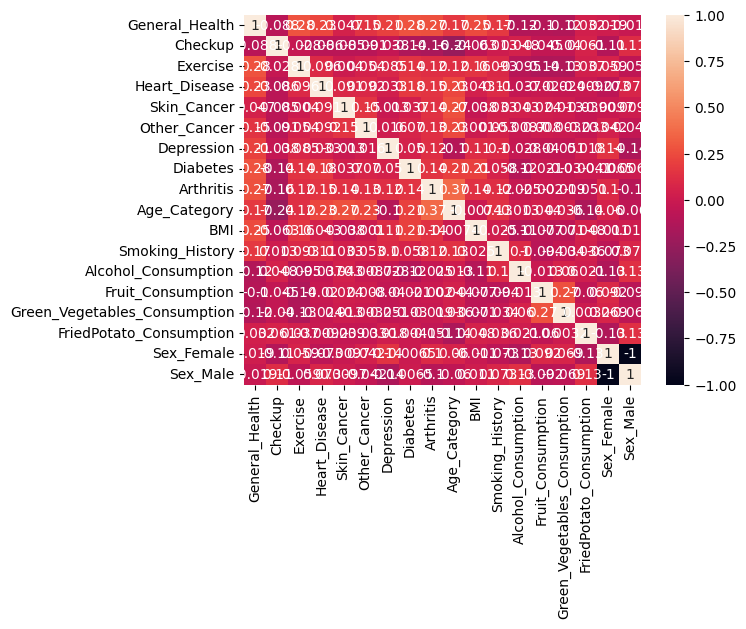

In [36]:
# data visualization
sns.heatmap(df.corr(), annot=True)
plt.show()

In [23]:
dependent_var

,Heart_Disease
0,0
1,1
2,0
3,1
4,0
...,...
308849,0
308850,0
308851,0
308852,0


In [24]:
# Set X and y values
X = independent_var
y = dependent_var


In [25]:
# Split Variables for test and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# import RandomForest
from sklearn.ensemble import RandomForestClassifier
# initailise model
model = RandomForestClassifier(n_estimators=100,random_state= 42)
# Fit the model
model.fit(X_train, y_train)
# Perform prediction
y_pred = model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {'n_estimators': randint(10, 100),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': randint(10, 50),
              'criterion': ['gini', 'entropy']}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=61),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of different parameter settings to sample
                                   cv=3,       # Number of cross-validation folds
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1) # Use all available cores

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train.values.ravel()) # Use ravel() to convert y_train to 1D array

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best accuracy score:", random_search.best_score_)

# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
print("\nTuned Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 'log2', 'n_estimators': 47}
Best accuracy score: 0.9194319317800091

Tuned Model Performance:
Accuracy: 0.919460588301954
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.57      0.02      0.04      4997

    accuracy                           0.92     61771
   macro avg       0.74      0.51      0.50     61771
weighted avg       0.89      0.92      0.88     61771

Confusion Matrix:
 [[56703    71]
 [ 4904    93]]


In [34]:
# Evaluate the model performance using Classification report, accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9178417056547571
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.44      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.68      0.53      0.53     61771
weighted avg       0.88      0.92      0.89     61771

Confusion Matrix:
 [[56398   376]
 [ 4699   298]]
